# Kickstarter Projects
## Notebook 05 : Prediction

Group's members:
- Crnigoj Gabriele 134176
- Ferraro Tommaso 132998
- Stinat Kevin 134905

## Data Loading and Managing for Data Predition

Classification is a classic data mining technique based on machine learning. Basically, classification is used to classify each item in a set of data into one of a predefined set of classes or groups. Classification method makes use of mathematical techniques such as decision trees, linear programming, neural network and statistics. In classification, we develop the software that can learn how to classify the data items into groups. In other words, the goal of classification is to accurately predict the target class for each case in the data.
Note that:

- A classification task begins with a data set in which the class assignments are known.
- Classifications are discrete and do not imply order.

The simplest type of classification problem is binary classification. In binary classification, the target attribute has only two possible values: for example, yes or no. Multiclass targets have more than two values: for example, low, medium, high.

In the model build (training) process, a classification algorithm finds relationships between the values of the predictors and the values of the target. Different classification algorithms use different techniques for finding relationships. These relationships are summarized in a model, which can then be applied to a different data set in which the class assignments are unknown. Classification models are tested by comparing the predicted values to known target values in a set of test data. The historical data for a classification project is typically divided into two data sets: one for building the model; the other for testing the model.

First we proceed to load and manage the data: in particular we check the correct data loading, the `NaN` or `Null` values and we set new names to some columns.

In second place, we proceed to set the values in the categorical columns: `Deadline_Year`,`Deadline_Month`, `Launch_Year` and `Launch_Month`. Now we are ready for the next steps of our analysis: the encoding.

In [1]:
import numpy as np
import pandas as pd
import joblib
import pickle
import os
from tqdm import tqdm
from tempfile import mkdtemp

In [57]:
savedir = 'Kickstarter_Dataframe'
filename = os.path.join(savedir, 'Kikstarter_Backup_File_Prova_Predizione') 

with open(filename,'rb') as r:
    df_prediction = joblib.load(r)
    
df_prediction.head()

,category,main_category,state,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days
103,Product Design,Design,failed,4,156.0,500.0,2016,10,2016,11,29
121,Product Design,Design,failed,67,3012.0,125000.0,2012,9,2012,10,34
177,Product Design,Design,failed,0,0.0,9500.0,2015,2,2015,4,59
179,Product Design,Design,failed,10,805.0,10000.0,2015,8,2015,9,29
212,Product Design,Design,failed,0,0.0,8000.0,2015,3,2015,4,29


In [58]:
df_prediction.shape

(79476, 11)

In [60]:
df_prediction = df_prediction.reset_index()
df_prediction = df_prediction.drop(columns=['index'])

In [63]:
df_prediction.head()

,category,main_category,state,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days
0,Product Design,Design,failed,4,156.0,500.0,2016,10,2016,11,29
1,Product Design,Design,failed,67,3012.0,125000.0,2012,9,2012,10,34
2,Product Design,Design,failed,0,0.0,9500.0,2015,2,2015,4,59
3,Product Design,Design,failed,10,805.0,10000.0,2015,8,2015,9,29
4,Product Design,Design,failed,0,0.0,8000.0,2015,3,2015,4,29


In [66]:
df_prediction.rename(columns = {'MDeadline_Month':'Deadline_Month', 'crowdfounding_period':'period_days'}, inplace=True)

In [67]:
#a little check
df_prediction.columns

Index(['category', 'main_category', 'state', 'backers', 'usd_pledged_real',
       'usd_goal_real', 'Launch_Year', 'Launch_Month', 'Deadline_Year',
       'Deadline_Month', 'period_days'],
      dtype='object')

In [68]:
categories_month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

df_prediction['Deadline_Month'] = df_prediction['Deadline_Month'].astype(pd.Categorical(df_prediction['Deadline_Month'], 
                                                                                        categories_month,ordered=True))
df_prediction['Launch_Month'] = df_prediction['Launch_Month'].astype(pd.Categorical(df_prediction['Launch_Month'], 
                                                                                    categories_month,ordered=True))

In [69]:
categories_years = [1970, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

df_prediction['Deadline_Year'] = df_prediction['Deadline_Year'].astype(pd.Categorical(df_prediction['Deadline_Year'], 
                                                                                      categories_years ,ordered=True))
df_prediction['Launch_Year'] = df_prediction['Launch_Year'].astype(pd.Categorical(df_prediction['Launch_Year'], 
                                                                                  categories_years ,ordered=True))

In [70]:
df_prediction.dtypes

category              object
main_category         object
state                 object
backers                int64
usd_pledged_real     float64
usd_goal_real        float64
Launch_Year         category
Launch_Month        category
Deadline_Year       category
Deadline_Month      category
period_days            int64
dtype: object

## Enconding 

we encode all the columns of our DataFrame, paying attention to the correct category of each columns and its corresponding `Encoder`. Our **Goal** was to predict the final `state` of a Project so we econde all the columns except `state` in the econding, otherwise `state` is put in the `target_econdoding`.

we also restricted the predictions to only three possible states: `successful`, `failed` and `canceled` because those are more meaningful thant the other (i.e. `live`). Then we proceed fitting our data and we can proceed with the core of this analysis: the prediction

In [71]:
#OneHotEncoder is used for categorical attributes
from sklearn.preprocessing import OneHotEncoder

#OrdinalEncoder is used for ordinal attributes
from sklearn.preprocessing import OrdinalEncoder

#DataFrameMapper is used to combine the previous encoding methods
from sklearn_pandas import DataFrameMapper

In [72]:
df_prediction.dtypes

category              object
main_category         object
state                 object
backers                int64
usd_pledged_real     float64
usd_goal_real        float64
Launch_Year         category
Launch_Month        category
Deadline_Year       category
Deadline_Month      category
period_days            int64
dtype: object

In [73]:
df_prediction.columns

Index(['category', 'main_category', 'state', 'backers', 'usd_pledged_real',
       'usd_goal_real', 'Launch_Year', 'Launch_Month', 'Deadline_Year',
       'Deadline_Month', 'period_days'],
      dtype='object')

In [82]:
encoding = DataFrameMapper([ 
    (['category', 'main_category'], OneHotEncoder(handle_unknown='ignore')),
    (['Launch_Year'], OrdinalEncoder(categories=[list(df_prediction['Launch_Year'].cat.categories)])),
    (['Launch_Month'], OrdinalEncoder(categories=[list(df_prediction['Launch_Month'].cat.categories)])),
    (['Deadline_Year'], OrdinalEncoder(categories=[list(df_prediction['Deadline_Year'].cat.categories)])),
    (['Deadline_Month'], OrdinalEncoder(categories=[list(df_prediction['Deadline_Month'].cat.categories)])),                                                                                                                                      
    (['backers', 'usd_pledged_real', 'usd_goal_real', 'period_days'], None) ])

encoding

DataFrameMapper(default=False, df_out=False,
                features=[(['category', 'main_category'],
                           OneHotEncoder(categories='auto', drop=None,
                                         dtype=<class 'numpy.float64'>,
                                         handle_unknown='ignore',
                                         sparse=True)),
                          (['Launch_Year'],
                           OrdinalEncoder(categories=[[1970, 2009, 2010, 2011,
                                                       2012, 2013, 2014, 2015,
                                                       2016, 2017, 2018]],
                                          dtype=<class 'numpy.float64'>)),
                          (['Launch_Month'],
                           Ordinal...
                                          dtype=<class 'numpy.float64'>)),
                          (['Deadline_Year'],
                           OrdinalEncoder(categories=[[1970, 2009, 2010, 201

In [84]:
df_prediction['state'] = df_prediction['state'].map(lambda s: 'successful' if s.startswith("successful") 
                                                            else s if s.startswith("failed") 
                                                            else s if s.startswith("canceled")
                                                            else "undefined")

In [85]:
df_prediction.state.unique()

array(['failed', 'successful', 'canceled'], dtype=object)

In [86]:
encoding_target = DataFrameMapper([ (['state'], OrdinalEncoder()) ])

encoding_target

DataFrameMapper(default=False, df_out=False,
                features=[(['state'],
                           OrdinalEncoder(categories='auto',
                                          dtype=<class 'numpy.float64'>))],
                input_df=False, sparse=False)

In [87]:
encoding.fit(df_prediction)

DataFrameMapper(default=False, df_out=False,
                features=[(['category', 'main_category'],
                           OneHotEncoder(categories='auto', drop=None,
                                         dtype=<class 'numpy.float64'>,
                                         handle_unknown='ignore',
                                         sparse=True)),
                          (['Launch_Year'],
                           OrdinalEncoder(categories=[[1970, 2009, 2010, 2011,
                                                       2012, 2013, 2014, 2015,
                                                       2016, 2017, 2018]],
                                          dtype=<class 'numpy.float64'>)),
                          (['Launch_Month'],
                           Ordinal...
                                          dtype=<class 'numpy.float64'>)),
                          (['Deadline_Year'],
                           OrdinalEncoder(categories=[[1970, 2009, 2010, 201

In [88]:
encoding_target.fit(df_prediction)

DataFrameMapper(default=False, df_out=False,
                features=[(['state'],
                           OrdinalEncoder(categories='auto',
                                          dtype=<class 'numpy.float64'>))],
                input_df=False, sparse=False)

## Classification

Classification makes use of mathematical techniques such as decision trees, linear programming, neural network and statistics. The goal is to develop the software that can learn how to classify the data items into groups. We decide to start our analysis with the use of a basic decision tree classifier. The iter is:

1) Encode the dataframe.\
2) Separate the dataframe in groups with the train_test_split function.\
3) Fit the model on the training groups.\
4) Predict the test group.\
5) Understand, with the accuracy score, how much the prediction differs from the reality.

First, we make an example of classification separating target columns from those which have to be predicted. In the next paraghaph, we use `Pipeline` function in ordine to do a more efficient and complete analysis.

As first approach to classification we tried to use a `sklearn.tree.DecisionTreeClassifier` from sklearn library. This methodology first of all requires to sub-divide our data into two sets, one to train the algorithm and one to test it: for this first step the function `sklearn.model_selection.train_test_split` comes really handy, also allowing the best division strategy. After several tries, the best division resulted to be the one with the set as below:

`train_test_split(x, y, stratify = y)`

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [90]:
X = encoding.transform(df_prediction.loc[:, df_prediction.columns != "state"])

In [91]:
y = encoding_target.transform(df_prediction[['state']])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [93]:
#create a DecisionTreeClassifier object
tree = DecisionTreeClassifier()

In [94]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
y_pred = tree.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred)

0.8418642105792944

## Pipeline and Cross_Validate Method

We managed to reach a value of accuracy of 0.84, meaning that 84 out of 100 sample are correctly predicted: as first try, this value is already quite satisfying for a classification on three levels. However, the application of better and more sophisticated techniques may lead to even better results. To continue our analysis the classification can be performed again using the `sklearn.model_selection.cross_validate` function that iterates the classification for a pre-defined number of times, in order to limit problems like overfitting, underfitting and get an insight on how the model will generalize to an independent data set. In addition to that, different classifiers are tried, such as the s`klearn.svm.LinearSVC` and the ensemble classifier `sklearn.ensemble.RandomForestClassifier` and `sklearn.ensemble.AdaBoostsClassifier`.

In order to make our analysis simpler, we decide to create some pipeline with different classification alghoritms. The are set in steps. The first is the encoding step, where we recycle the encoding function. Secondly, we apply the classificatory. Finally we use the `Cross_Validate` function to understand which one is the most effective algorithm.

In [97]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("preprocess", encoding),
    ("decision_tree", DecisionTreeClassifier())
])

In [98]:
pipeline.fit(df_prediction, y)
y_pred = pipeline.predict(df_prediction)
accuracy_score(y_pred, y)

0.997798077407016

In [99]:
from sklearn.model_selection import cross_validate
results = cross_validate(pipeline, df_prediction, y, cv=10, return_train_score=False)
results

{'fit_time': array([2.28838086, 2.81809449, 2.15131044, 2.00835562, 2.26927352,
        2.15631366, 2.10231876, 2.09333491, 2.00535059, 1.86540127]),
 'score_time': array([0.09297252, 0.14895272, 0.06897736, 0.07097769, 0.07597542,
        0.0709784 , 0.06897831, 0.07097864, 0.07397628, 0.06897831]),
 'test_score': array([0.79214897, 0.79416205, 0.80045294, 0.84763463, 0.85606442,
        0.74874182, 0.72492765, 0.82597206, 0.84711212, 0.86825217])}

In [100]:
from sklearn.svm import LinearSVC
svc_pipeline = Pipeline([
    ("Preprocess", encoding),
    ("clf", LinearSVC())
])

In [101]:
svc_results = cross_validate(svc_pipeline, df_prediction, y.T[0], cv=10, return_train_score=False)
svc_results

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

{'fit_time': array([107.81776857, 115.66807532, 114.98750234,  97.01145935,
        107.62713265, 130.55823159, 131.8712759 , 111.71422672,
        113.16571689, 117.74833632]),
 'score_time': array([0.09497809, 0.08497524, 0.11496496, 0.12795591, 0.0779736 ,
        0.13595486, 0.10496736, 0.14195538, 0.1109736 , 0.09696937]),
 'test_score': array([0.88236034, 0.86524912, 0.85468042, 0.85279316, 0.88210871,
        0.71489683, 0.71788096, 0.53705801, 0.87026551, 0.88951806])}

**A comparison between SVC and DecisionTree methods** : Now we do a cross validation. We separate in cv (groups) the dataframe, using K-fold method. Then cross_validate do a classification for every group using the algorithms. In this case, we decide to compare the decision tree with the SVC model. As we can see above, the decision tree alghoritm works well and better than SVC. We can claim that because the “moustaches” are really separated than the decision tree’s ones.

In [102]:
comparison = pd.DataFrame({ 'Decision_Tree': results['test_score'], 'SVC': svc_results['test_score'] })

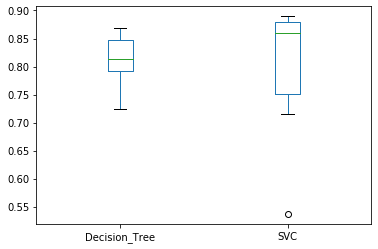

In [103]:
comparison.plot.box()

## Parameters Setting of the DecisionTree

Because the decision tree has a better prediction, we want to understand what is the best parameters setting in order to improve his effectiveness. In particular, we change max_depth and min_sample_split parameters. In the end we save the best estimator, which may be used for further analysis.

In [104]:
parameters = { 'decision_tree__max_depth': [2, 3, 4, 10, 15], 'decision_tree__min_samples_split': [0.02, 0.05, 0.1, 0.2] }

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [106]:
gs = GridSearchCV(pipeline, parameters, cv=StratifiedKFold(5))

In [107]:
gs.fit(df_prediction, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        DataFrameMapper(default=False,
                                                        df_out=False,
                                                        features=[(['category',
                                                                    'main_category'],
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                           

In [108]:
pd.DataFrame(gs.cv_results_).sort_values(by="rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__max_depth,param_decision_tree__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.979884,0.138412,0.127361,0.010361,3,0.02,"{'decision_tree__max_depth': 3, 'decision_tree...",0.821653,0.563636,0.820447,0.833721,0.836552,0.775202,0.105975,1
5,0.900511,0.116596,0.131758,0.008232,3,0.05,"{'decision_tree__max_depth': 3, 'decision_tree...",0.821653,0.563636,0.820447,0.833721,0.836552,0.775202,0.105975,1
6,1.211011,0.128124,0.200336,0.062828,3,0.1,"{'decision_tree__max_depth': 3, 'decision_tree...",0.821653,0.563636,0.820447,0.792702,0.836552,0.766998,0.102663,3
0,1.095046,0.166224,0.197942,0.032218,2,0.02,"{'decision_tree__max_depth': 2, 'decision_tree...",0.697094,0.748852,0.759799,0.738723,0.749166,0.738727,0.021858,4
1,0.943702,0.287343,0.133751,0.028293,2,0.05,"{'decision_tree__max_depth': 2, 'decision_tree...",0.697094,0.748852,0.759799,0.738723,0.749166,0.738727,0.021858,4


In [109]:
gs.best_params_

{'decision_tree__max_depth': 3, 'decision_tree__min_samples_split': 0.02}

In [110]:
best_tree = gs.best_estimator_

## Confusion Matrix

A `Confusion Matrix` is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm. The prediction isn’t perfect, in particular there are too many errors in the 0 prediction. They are often predicted as 1.

A confusion matrix is a table that is often used to describe the performance of a classification model (or classifier) on a set of test data for which the true values are known. In other words, it is a performance measurement for machine learning classification problem where output can be two or more classes (3, in our case).
Let's consider an example with binary classifier: the table will have 4 different combinations of predicted and actual values.
- True Positive: You predicted positive and it’s true.
- True Negative: You predicted negative and it’s true.
- False Positive: You predicted positive and it’s false.
- False Negative: You predicted negative and it’s false.

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(df_prediction, y, stratify=y)
best_tree.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 DataFrameMapper(default=False, df_out=False,
                                 features=[(['category', 'main_category'],
                                            OneHotEncoder(categories='auto',
                                                          drop=None,
                                                          dtype=<class 'numpy.float64'>,
                                                          handle_unknown='ignore',
                                                          sparse=True)),
                                           (['Launch_Year'],
                                            OrdinalEncoder(categories=[[1970,
                                                                        2009,
                                                                        2010,
                                                                        2011,
                                              

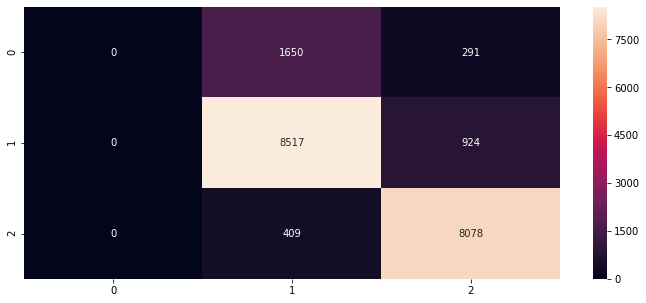

In [113]:
plt.figure(figsize = (12, 5))
cm = confusion_matrix(y_test, best_tree.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")

## Other Algorithms : AdaBoostClassifier

`AdaBoost` is a machine learning meta-algorithm. It uses 'weak learners' which are combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favour of those instances misclassified by previous classifiers.

The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. AdaBoost is sensitive to noisy data and outliers. In some problems it can be less susceptible to the overfitting problem than other learning algorithms. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner. 

Every learning algorithm tends to suit some problem types better than others, and typically has many different parameters and configurations to adjust before it achieves optimal performance on a dataset, AdaBoost (with decision trees as the weak learners) is often referred to as the best out-of-the-box classifier. When used with decision tree learning, information gathered at each stage of the AdaBoost algorithm about the relative 'hardness' of each training sample is fed into the tree growing algorithm such that later trees tend to focus on harder-to-classify examples.

We combine `AdaBoost` and `GridSarch` to adapt and set the parameters for our analysis.

In [114]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from numpy import ravel
from tqdm import tqdm 

In [115]:
abc_pipeline = Pipeline([
    ("preprocess", encoding),
    ("ada_classificator", AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 10)))
])

In [116]:
param_grid_ADA = {"ada_classificator__n_estimators": [50, 75, 100, 150]}

In [117]:
gs_ADA = GridSearchCV(abc_pipeline, param_grid_ADA , cv=StratifiedKFold(5))

In [118]:
gs_ADA.fit(df_prediction, ravel(y))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        DataFrameMapper(default=False,
                                                        df_out=False,
                                                        features=[(['category',
                                                                    'main_category'],
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                           

In [119]:
ada_df = pd.DataFrame(gs_ADA.cv_results_).sort_values(by="rank_test_score").head(5)

In [120]:
ada_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ada_classificator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,86.037386,6.362836,1.347968,0.200816,75,{'ada_classificator__n_estimators': 75},0.604806,0.602202,0.800818,0.693551,0.782636,0.696803,0.084392,1
2,113.196303,13.392369,1.380953,0.416204,100,{'ada_classificator__n_estimators': 100},0.603611,0.586600,0.819692,0.650393,0.782384,0.688536,0.094939,2
0,56.631328,2.059299,0.819346,0.036034,50,{'ada_classificator__n_estimators': 50},0.550956,0.573262,0.809248,0.683297,0.759925,0.675338,0.101035,3
3,171.407693,7.965838,2.287267,0.343134,150,{'ada_classificator__n_estimators': 150},0.601787,0.596917,0.741743,0.655175,0.771123,0.673349,0.071457,4


In [121]:
best_ADA = gs_ADA.best_estimator_
best_ADA

Pipeline(memory=None,
         steps=[('preprocess',
                 DataFrameMapper(default=False, df_out=False,
                                 features=[(['category', 'main_category'],
                                            OneHotEncoder(categories='auto',
                                                          drop=None,
                                                          dtype=<class 'numpy.float64'>,
                                                          handle_unknown='ignore',
                                                          sparse=True)),
                                           (['Launch_Year'],
                                            OrdinalEncoder(categories=[[1970,
                                                                        2009,
                                                                        2010,
                                                                        2011,
                                              

In [122]:
gs_ADA.best_params_

{'ada_classificator__n_estimators': 75}

In [123]:
x_tr , x_tst, y_tr , y_tst = train_test_split(df_prediction, y)

In [124]:
best_ADA.fit(df_prediction, ravel(y))
y_pred_ADA = best_ADA.predict(df_prediction)
accuracy_score(y_pred_ADA, y)

0.8155543811968393

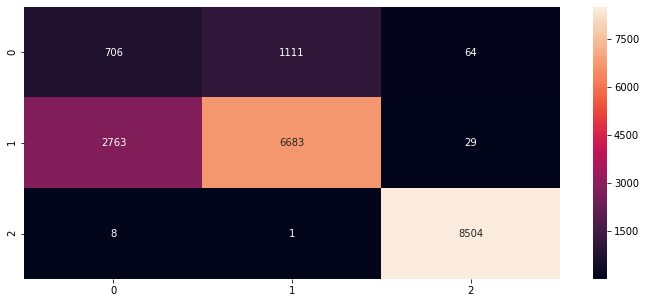

In [125]:
plt.figure(figsize = (12, 5))
best_ADA.fit(x_tr,ravel(y_tr))
cm = confusion_matrix(y_tst, best_ADA.predict(x_tst))
sns.heatmap(cm, annot=True, fmt="d")

The confusion matrix delineates that AdaBoost has a better prediction from the basic usage of a decision tree classificatory.

## Other Algorithms: Random Forest

`Random Forest` is an ensemble learning method for classification. It is similar to AdaBoost but it uses elementary decision trees as ‘weak learners’. It prevents the decision trees’ habit to overfit to their training set. 

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is: "A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models".

The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are:
- There needs to be some actual signal in our features so that models built using those features do better than random guessing.
- The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.


We combine `Random Forest` and `GridSarch` to adapt and set the parameters for our analysis.

In [126]:
RF_pipeline = Pipeline([
    ("preprocess", encoding),
    ("RF_classificator", RandomForestClassifier())
])

In [127]:
param_grid_RF = {"RF_classificator__n_estimators": [50, 100, 150],
                 "RF_classificator__criterion": ["gini", "entropy"]}

In [128]:
gs_RF = GridSearchCV(RF_pipeline, param_grid_RF)

In [129]:
gs_RF.fit(df_prediction, ravel(y))

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        DataFrameMapper(default=False,
                                                        df_out=False,
                                                        features=[(['category',
                                                                    'main_category'],
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True)),
                                                 

In [130]:
RF_df = pd.DataFrame(gs_RF.cv_results_).sort_values(by="rank_test_score").head(5)

In [131]:
RF_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RF_classificator__criterion,param_RF_classificator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,50.933297,0.902323,1.305180,0.071004,entropy,150,"{'RF_classificator__criterion': 'entropy', 'RF...",0.228485,0.502800,0.724127,0.668953,0.710601,0.566993,0.186772,1
0,15.072041,0.567623,0.459853,0.101626,gini,50,"{'RF_classificator__criterion': 'gini', 'RF_cl...",0.231190,0.502988,0.712048,0.668198,0.709720,0.564829,0.183571,2
4,33.204750,2.076615,0.847330,0.160642,entropy,100,"{'RF_classificator__criterion': 'entropy', 'RF...",0.227101,0.502674,0.713935,0.669330,0.710035,0.564615,0.185559,3
3,17.489527,0.238007,0.543825,0.028239,entropy,50,"{'RF_classificator__criterion': 'entropy', 'RF...",0.236412,0.502988,0.691412,0.669204,0.709343,0.561872,0.178572,4
1,25.598292,3.606537,0.866124,0.133433,gini,100,"{'RF_classificator__criterion': 'gini', 'RF_cl...",0.228800,0.502296,0.692042,0.670022,0.710160,0.560664,0.181719,5


In [132]:
best_RF = gs_RF.best_estimator_
best_RF

Pipeline(memory=None,
         steps=[('preprocess',
                 DataFrameMapper(default=False, df_out=False,
                                 features=[(['category', 'main_category'],
                                            OneHotEncoder(categories='auto',
                                                          drop=None,
                                                          dtype=<class 'numpy.float64'>,
                                                          handle_unknown='ignore',
                                                          sparse=True)),
                                           (['Launch_Year'],
                                            OrdinalEncoder(categories=[[1970,
                                                                        2009,
                                                                        2010,
                                                                        2011,
                                              

In [133]:
gs_RF.best_params_

{'RF_classificator__criterion': 'entropy',
 'RF_classificator__n_estimators': 150}

In [134]:
best_RF.fit(df_prediction, ravel(y))
y_pred_RF = best_RF.predict(df_prediction)
accuracy_score(y_pred_RF, y)

0.997798077407016

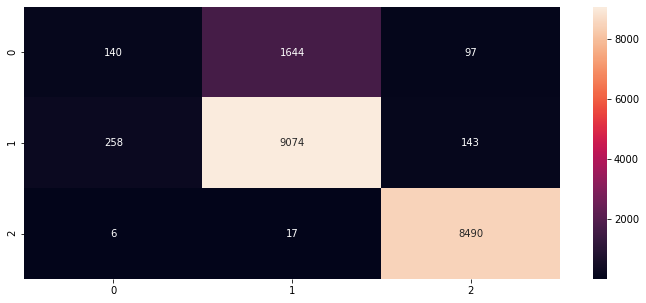

In [135]:
plt.figure(figsize = (12, 5))
best_RF.fit(x_tr, ravel(y_tr))
cm = confusion_matrix(y_tst, best_RF.predict(x_tst))
sns.heatmap(cm, annot=True, fmt="d")

## Cross Validation: AdaBoosts and RandomForest

Our aim in this notebook is recognize the best classificatory for our dataframe. In order to do that we use a cross validation comparison. We are going to do the same we did for the decision tree algorithm at the beginning. 

In [136]:
results_ADA = cross_validate(best_ADA, df_prediction, ravel(y), cv=10, return_train_score=False)
results_ADA

{'fit_time': array([103.6788919 ,  96.37518406, 100.19326901,  88.50462341,
        101.59822869, 102.27596617, 101.07885432, 103.32860613,
         98.92904186, 105.20483994]),
 'score_time': array([0.60579944, 0.25591612, 0.42286134, 0.67779112, 0.72876763,
        0.64679527, 0.60280013, 0.62080574, 0.61680269, 0.44386315]),
 'test_score': array([0.78271263, 0.79227479, 0.71930045, 0.76673377, 0.84197282,
        0.71451938, 0.74329936, 0.74506103, 0.80948786, 0.81754121])}

In [137]:
results_RF = cross_validate(best_RF, df_prediction, ravel(y), cv=10, return_train_score=False)
results_RF

{'fit_time': array([51.57146406, 51.81435847, 58.00717163, 39.68554807, 43.03419638,
        56.68082833, 58.69518209, 58.47254539, 59.12526846, 55.87508488]),
 'score_time': array([0.32089901, 0.83673477, 0.37787747, 0.65779185, 0.57881546,
        0.61481857, 1.00868082, 1.08565164, 1.082654  , 0.34989119]),
 'test_score': array([0.87506291, 0.87795672, 0.87518873, 0.88902869, 0.89028686,
        0.71942627, 0.72077514, 0.88800805, 0.89102806, 0.80999119])}

## Final Comparison between all the Algorithms

In [138]:
final_comparison = pd.DataFrame({ 'Decision_Tree': results['test_score'], 'SVC': svc_results['test_score'],
                                 'AdaBoostQualifier': results_ADA['test_score'], 'Random_Forest': results_RF['test_score'] })

In [139]:
final_comparison

,Decision_Tree,SVC,AdaBoostQualifier,Random_Forest
0,0.792149,0.882360,0.782713,0.875063
1,0.794162,0.865249,0.792275,0.877957
2,0.800453,0.854680,0.719300,0.875189
3,0.847635,0.852793,0.766734,0.889029
4,0.856064,0.882109,0.841973,0.890287
5,0.748742,0.714897,0.714519,0.719426
6,0.724928,0.717881,0.743299,0.720775
7,0.825972,0.537058,0.745061,0.888008
8,0.847112,0.870266,0.809488,0.891028
9,0.868252,0.889518,0.817541,0.809991


In [140]:
final_comparison.describe()

,Decision_Tree,SVC,AdaBoostQualifier,Random_Forest
count,10.000000,10.000000,10.000000,10.000000
mean,0.810547,0.806681,0.773290,0.843675
std,0.047389,0.115079,0.042873,0.069336
min,0.724928,0.537058,0.714519,0.719426
25%,0.792652,0.751609,0.743740,0.826259
50%,0.813213,0.859965,0.774723,0.876573
75%,0.847504,0.879148,0.805185,0.888774
max,0.868252,0.889518,0.841973,0.891028


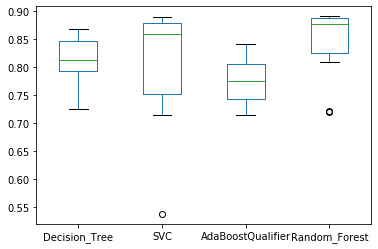

In [141]:
final_comparison.plot.box()

## Conclusion of Notebook 05.1:
>This is an important graphic. In the first part of notebook 4, we should decide to use an SVC classificator. But thanks to the cross validation, we can argue several points:
- The usage of SVC, for our dataframe, led us to a poor accuracy, in fact its variance is worse than Decision_Tree and AdaBoost. Moreover, an ensemble method like AdaBoost will get worse our prediction.
- The best algorithm to predict if a future project could be successful may be RandomForest. Its mean is much better than the others' one. Furthermore, its variance is really good, although the presence of an outlier.\

>In conclusion, we claim that the RandomForest fitted model should be use to predict if a project will be successful or not.

# Our Project

Now we have a model through which we can predict if a project may be successful or not.

In [165]:
df_ks = pd.read_csv('nostroprogetto.csv')
df_ks.head()

,Unnamed: 0,category,main_category,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days
0,0,Product Design,Design,21,2000,5000,2018,2,2018,4,61


In [166]:
df_ks = df_ks.drop(columns = 'Unnamed: 0')

In [167]:
df_ks

,category,main_category,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days
0,Product Design,Design,21,2000,5000,2018,2,2018,4,61


In [185]:
y_pred_RF = best_RF.predict(df_ks)

In [186]:
y_pred_RF

array([1.])

## Conclusion of Notebook 05.2:
>This example argues that the project we want to create may fail. The model we use to predict can be applied to other projects in order to evaluate them. Our project is classified as Successful (1)